In [55]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from prophet import Prophet



ModuleNotFoundError: No module named 'prophet'

# Data Batch Processing

In [ ]:
#  The files in the folder need to be manually processed before batch processing. Delete the txt files that do not contain data and remove the explanatory text in the txt files. Additionally, save the field explanatory text.
#extract the file paths of all files in a specified folder path
def listdir(path): 
    list_name =[]
    file_name = []
    for file in os.listdir(path):
        file_path = os.path.join(path, file) 
        list_name.append(file_path)
    return list_name 

#  To obtain all the txt data, remove the ID column, and then merge them into one dataframe:
def get_all_data(list_name):
        # create an initialized dataframe to store the data of the first txt

    dataOne = []
    with open(list_name[0],'r') as f:
        contents  = f.readlines()
        for content in contents:
            dataOne.append(content.split(','))
    datadf = pd.DataFrame(dataOne)
    datadf.columns = [x.strip() for x in datadf.iloc[0].tolist() ] #delete spaces
    datadf = datadf[1:]
    datadf = datadf.drop('SOUID',axis=1) # same city has same ID
    print(datadf)

    #iterate through the names of the columns merged by the DATE column
    for file in list_name[1:]:
        print(file)
        dataOne = []
        with open(file,'r') as f:
            contents  = f.readlines()
            for content in contents:
                dataOne.append(content.split(','))
        dataOnedf = pd.DataFrame(dataOne)
        dataOnedf.columns = [x.strip() for x in dataOnedf.iloc[0].tolist() ]
        dataOnedf = dataOnedf[1:]
        dataOnedf = dataOnedf.drop('SOUID',axis=1)
        datadf = pd.merge(datadf,dataOnedf,on='DATE')
    return datadf

In [ ]:
end_file1 = 'data/DS_ESKDALEMUIR'
list_name  = listdir(end_file1)
# print(list_name)
datadf_ESKDALEMUIR = get_all_data(list_name)

In [ ]:
datadf_ESKDALEMUIR.info()

In [ ]:
## delete some spaces and taps
for col in datadf_ESKDALEMUIR.columns[1:]:
    newData = []
    for x in datadf_ESKDALEMUIR[col].tolist():
        newData.append(float(x.replace('\n','').strip()))
    datadf_ESKDALEMUIR[col] = newData
datadf_ESKDALEMUIR

In [ ]:
datadf_ESKDALEMUIR.to_csv('DS_ESKDALEMUIR.csv',encoding='utf-8')

# data preprocessing

first city：ESKDALEMUIR¶

In [56]:
datadf_ESKDALEMUIR

,DATE,CC,Q_CC,HU,Q_HU,QQ,Q_QQ,SD,Q_SD,SS,Q_SS,TG,Q_TG,TN,Q_TN,TX,Q_TX
0,19570101,8.0,0.0,93.0,0.0,8.000000,0.0,0.0,0.0,0.00000,0.0,28.0,0.0,11.0,0.0,61.0,0.0
2,19570102,8.0,0.0,93.0,0.0,8.000000,0.0,0.0,0.0,0.00000,0.0,20.0,0.0,-22.0,0.0,89.0,0.0
4,19570103,7.0,0.0,93.0,0.0,12.000000,0.0,0.0,0.0,2.00000,0.0,36.0,0.0,-17.0,0.0,100.0,0.0
6,19570104,7.0,0.0,94.0,0.0,8.000000,0.0,0.0,0.0,0.00000,0.0,70.0,0.0,39.0,0.0,100.0,0.0
8,19570105,7.0,0.0,90.0,0.0,8.000000,0.0,0.0,0.0,0.00000,0.0,72.0,0.0,44.0,0.0,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48264,20230127,6.0,0.0,94.0,0.0,96.295609,9.0,0.0,0.0,31.53199,9.0,-3.0,0.0,-37.0,0.0,76.0,0.0
48266,20230128,7.0,0.0,90.0,0.0,42.000000,0.0,0.0,0.0,32.00000,0.0,21.0,0.0,-33.0,0.0,81.0,0.0
48268,20230129,7.0,0.0,91.0,0.0,13.000000,0.0,0.0,0.0,0.00000,0.0,54.0,0.0,27.0,0.0,79.0,0.0
48270,20230130,6.0,0.0,80.0,0.0,49.000000,0.0,0.0,0.0,43.00000,0.0,57.0,0.0,35.0,0.0,61.0,0.0


In [57]:
datadf_ESKDALEMUIR.info() # check the type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24137 entries, 0 to 48272
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    24137 non-null  object 
 1   CC      24137 non-null  float64
 2   Q_CC    24137 non-null  float64
 3   HU      24137 non-null  float64
 4   Q_HU    24137 non-null  float64
 5   QQ      24137 non-null  float64
 6   Q_QQ    24137 non-null  float64
 7   SD      24137 non-null  float64
 8   Q_SD    24137 non-null  float64
 9   SS      24137 non-null  float64
 10  Q_SS    24137 non-null  float64
 11  TG      24137 non-null  float64
 12  Q_TG    24137 non-null  float64
 13  TN      24137 non-null  float64
 14  Q_TN    24137 non-null  float64
 15  TX      24137 non-null  float64
 16  Q_TX    24137 non-null  float64
dtypes: float64(16), object(1)
memory usage: 3.3+ MB


In [58]:
datadf_ESKDALEMUIR =datadf_ESKDALEMUIR.drop_duplicates()# delete identical data

In [59]:
datadf_ESKDALEMUIR.isna().sum() # check the nulls

DATE    0
CC      0
Q_CC    0
HU      0
Q_HU    0
QQ      0
Q_QQ    0
SD      0
Q_SD    0
SS      0
Q_SS    0
TG      0
Q_TG    0
TN      0
Q_TN    0
TX      0
Q_TX    0
dtype: int64

In [60]:
# Judge based on Q prefix 1 and 9 are both outliers 0 is a normal value
datadf_ESKDALEMUIR.loc[datadf_ESKDALEMUIR['Q_QQ']>0,'QQ'] = datadf_ESKDALEMUIR['QQ'].mean()
datadf_ESKDALEMUIR.loc[datadf_ESKDALEMUIR['Q_CC']>0,'CC'] = datadf_ESKDALEMUIR['CC'].mean()
datadf_ESKDALEMUIR.loc[datadf_ESKDALEMUIR['Q_HU']>0,'HU'] = datadf_ESKDALEMUIR['HU'].mean()
datadf_ESKDALEMUIR.loc[datadf_ESKDALEMUIR['Q_SD']>0,'SD'] = datadf_ESKDALEMUIR['SD'].mean()
datadf_ESKDALEMUIR.loc[datadf_ESKDALEMUIR['Q_SS']>0,'SS'] = datadf_ESKDALEMUIR['SS'].mean()
datadf_ESKDALEMUIR.loc[datadf_ESKDALEMUIR['Q_TG']>0,'TG'] = datadf_ESKDALEMUIR['TG'].mean()
datadf_ESKDALEMUIR.loc[datadf_ESKDALEMUIR['Q_TN']>0,'TN'] = datadf_ESKDALEMUIR['TN'].mean()
datadf_ESKDALEMUIR.loc[datadf_ESKDALEMUIR['Q_TX']>0,'TX'] = datadf_ESKDALEMUIR['TX'].mean()

In [61]:
datadf_ESKDALEMUIR

,DATE,CC,Q_CC,HU,Q_HU,QQ,Q_QQ,SD,Q_SD,SS,Q_SS,TG,Q_TG,TN,Q_TN,TX,Q_TX
0,19570101,8.0,0.0,93.0,0.0,8.00000,0.0,0.0,0.0,0.000000,0.0,28.0,0.0,11.0,0.0,61.0,0.0
2,19570102,8.0,0.0,93.0,0.0,8.00000,0.0,0.0,0.0,0.000000,0.0,20.0,0.0,-22.0,0.0,89.0,0.0
4,19570103,7.0,0.0,93.0,0.0,12.00000,0.0,0.0,0.0,2.000000,0.0,36.0,0.0,-17.0,0.0,100.0,0.0
6,19570104,7.0,0.0,94.0,0.0,8.00000,0.0,0.0,0.0,0.000000,0.0,70.0,0.0,39.0,0.0,100.0,0.0
8,19570105,7.0,0.0,90.0,0.0,8.00000,0.0,0.0,0.0,0.000000,0.0,72.0,0.0,44.0,0.0,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48264,20230127,6.0,0.0,94.0,0.0,95.89327,9.0,0.0,0.0,30.908865,9.0,-3.0,0.0,-37.0,0.0,76.0,0.0
48266,20230128,7.0,0.0,90.0,0.0,42.00000,0.0,0.0,0.0,32.000000,0.0,21.0,0.0,-33.0,0.0,81.0,0.0
48268,20230129,7.0,0.0,91.0,0.0,13.00000,0.0,0.0,0.0,0.000000,0.0,54.0,0.0,27.0,0.0,79.0,0.0
48270,20230130,6.0,0.0,80.0,0.0,49.00000,0.0,0.0,0.0,43.000000,0.0,57.0,0.0,35.0,0.0,61.0,0.0


CC
average value is：6.099，The standard deviation is ：1.769
------
there are 0 outliers
there are 0 outliers
HU
average value is：85.757，The standard deviation is ：8.092
------
there are 39 outliers
there are 0 outliers
QQ
average value is：95.889，The standard deviation is ：78.901
------
there are 18 outliers
there are 0 outliers
SD
average value is：0.287，The standard deviation is ：1.274
------
there are 720 outliers
there are 848 outliers
SS
average value is：30.906，The standard deviation is ：34.796
------
there are 101 outliers
there are 41 outliers
TG
average value is：73.780，The standard deviation is ：48.539
------
there are 4 outliers
there are 0 outliers
TN
average value is：36.751，The standard deviation is ：50.699
------
there are 10 outliers
there are 0 outliers
TX
average value is：114.911，The standard deviation is ：53.712
------
there are 0 outliers
there are 0 outliers


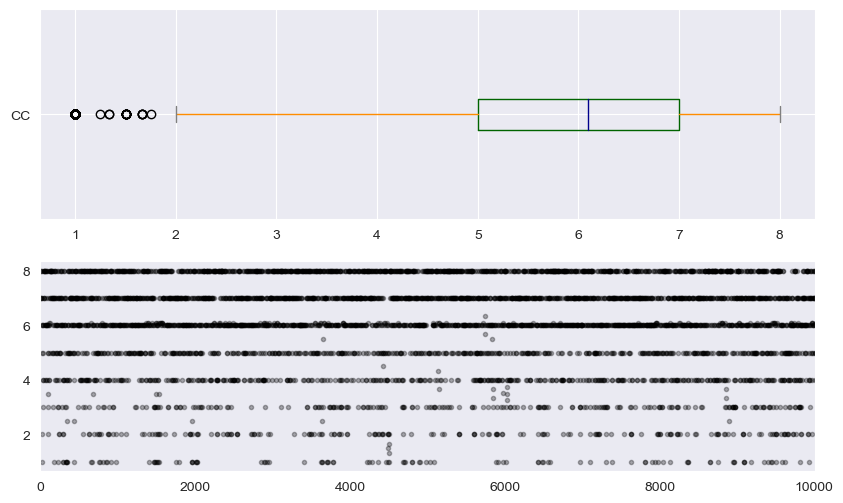

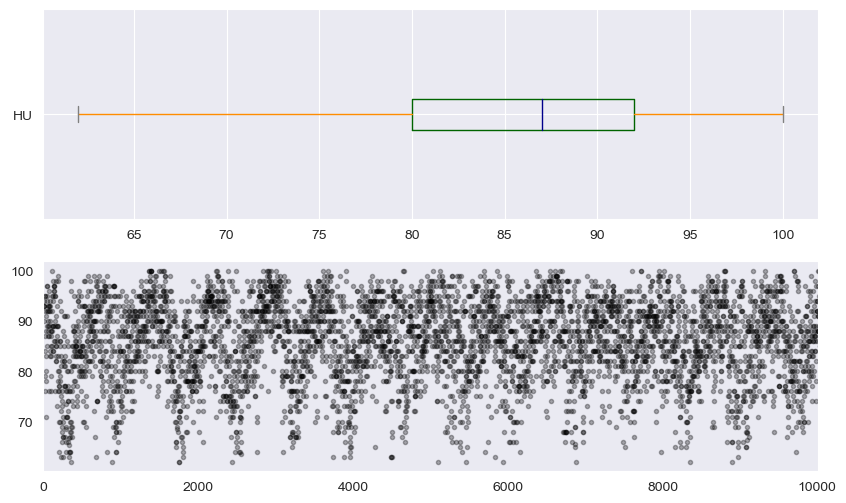

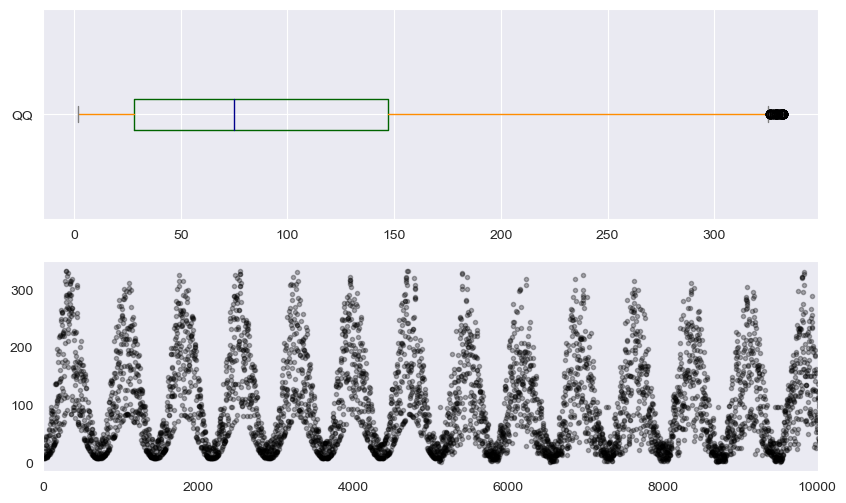

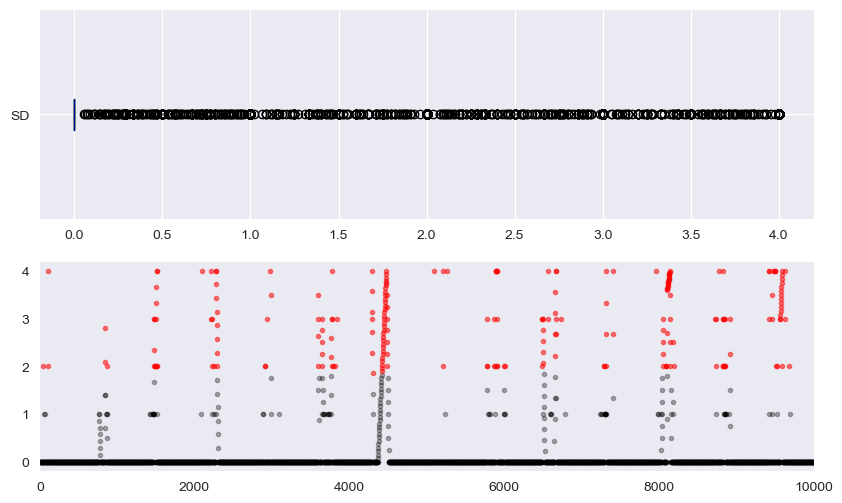

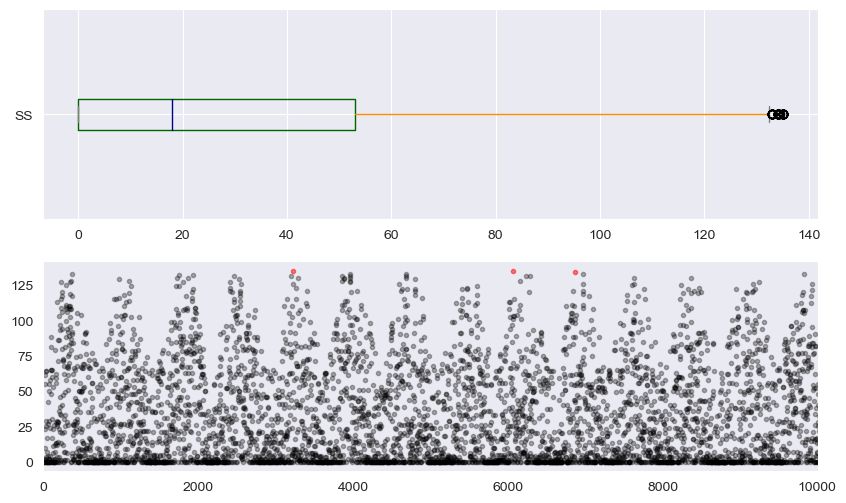

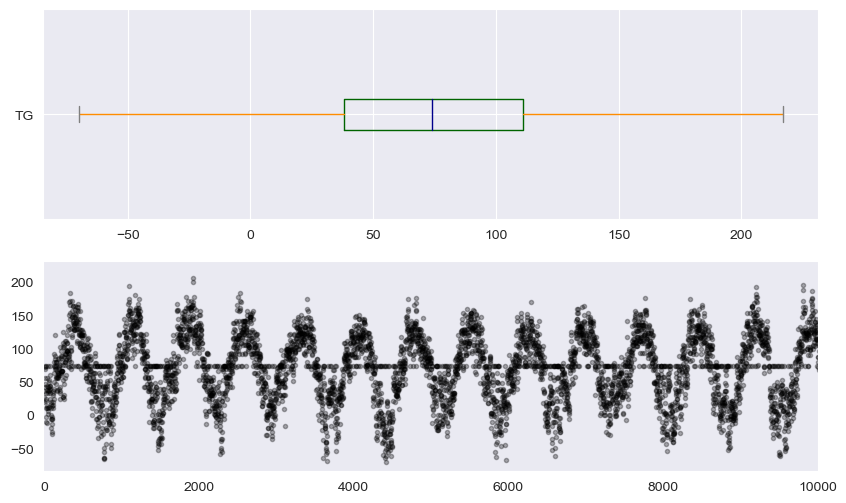

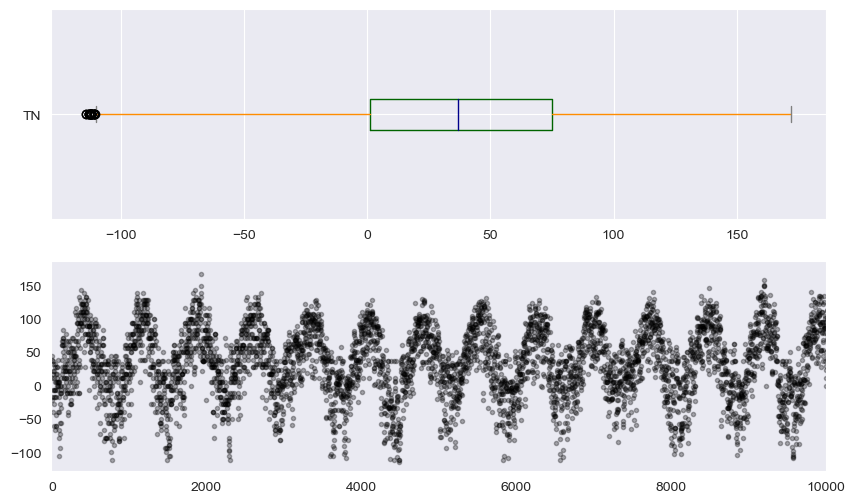

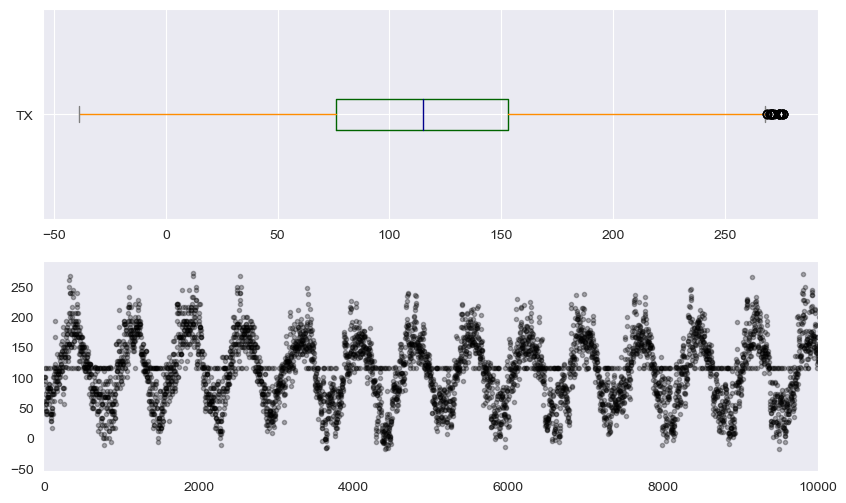

In [62]:
#  Plotting box plots and scatter plots after removing outliers
# Outliers are marked in red
# The 3σ principle: if the data follows a normal distribution, an outlier is defined as a value in a set of measurements that deviates from the mean by a factor of more than 3 → p(|x - μ| > 3σ) ≤ 0.003

def dealData(col):
    data = datadf_ESKDALEMUIR[col]
    u = data.mean()
    std = data.std()
    stats.kstest(data, 'norm', (u, std))
    print('average value is：%.3f，The standard deviation is ：%.3f' % (u,std))
    print('------')

    error = data[np.abs(data - u) > 3*std]
    data_c = data[np.abs(data - u) <= 3*std]
    print('there are %i outliers' % len(error))

    datadf_ESKDALEMUIR[col] = data_c 
    datadf_ESKDALEMUIR[col] = datadf_ESKDALEMUIR[col].interpolate()
    
    

def drawImg1(col):
    data = datadf_ESKDALEMUIR[col]
    u = data.mean()
    std = data.std()
    stats.kstest(data, 'norm', (u, std))

    error = data[np.abs(data - u) > 3*std]
    data_c = data[np.abs(data - u) <= 3*std]
    print('there are %i outliers' % len(error))

    
    fig = plt.figure(figsize = (10,6))
    ax1 = fig.add_subplot(2,1,1)
    color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
    data.plot.box(vert=False, grid = True,color = color,ax = ax1,label = col)
    # boxplot

    ax2 = fig.add_subplot(2,1,2)
    plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
    plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
    plt.xlim([-10,10010])
    plt.grid()
    

col_ls = ['CC','HU','QQ','SD','SS','TG','TN','TX']
for col in col_ls :
    print(col)
    dealData(col)
    drawImg1(col)

In [63]:

datadf_ESKDALEMUIR_real = datadf_ESKDALEMUIR[['DATE','CC','HU','QQ','SD','SS','TG','TN','TX']]
datadf_ESKDALEMUIR_real

,DATE,CC,HU,QQ,SD,SS,TG,TN,TX
0,19570101,8.0,93.0,8.00000,0.0,0.000000,28.0,11.0,61.0
2,19570102,8.0,93.0,8.00000,0.0,0.000000,20.0,-22.0,89.0
4,19570103,7.0,93.0,12.00000,0.0,2.000000,36.0,-17.0,100.0
6,19570104,7.0,94.0,8.00000,0.0,0.000000,70.0,39.0,100.0
8,19570105,7.0,90.0,8.00000,0.0,0.000000,72.0,44.0,72.0
...,...,...,...,...,...,...,...,...,...
48264,20230127,6.0,94.0,95.89327,0.0,30.908865,-3.0,-37.0,76.0
48266,20230128,7.0,90.0,42.00000,0.0,32.000000,21.0,-33.0,81.0
48268,20230129,7.0,91.0,13.00000,0.0,0.000000,54.0,27.0,79.0
48270,20230130,6.0,80.0,49.00000,0.0,43.000000,57.0,35.0,61.0


In [64]:

datadf_ESKDALEMUIR_real[['CC','HU','QQ','SD','SS','TG','TN','TX']].corr()

,CC,HU,QQ,SD,SS,TG,TN,TX
CC,1.000000,0.575608,-0.428291,-0.043844,-0.742186,0.090022,0.279702,-0.046668
HU,0.575608,1.000000,-0.665141,0.039934,-0.701117,-0.129275,0.032965,-0.224108
QQ,-0.428291,-0.665141,1.000000,-0.152786,0.773342,0.514037,0.302513,0.598234
SD,-0.043844,0.039934,-0.152786,1.000000,-0.052772,-0.350357,-0.317666,-0.322581
SS,-0.742186,-0.701117,0.773342,-0.052772,1.000000,0.217769,0.003289,0.318774
TG,0.090022,-0.129275,0.514037,-0.350357,0.217769,1.000000,0.898186,0.897720
TN,0.279702,0.032965,0.302513,-0.317666,0.003289,0.898186,1.000000,0.715909
TX,-0.046668,-0.224108,0.598234,-0.322581,0.318774,0.897720,0.715909,1.000000


<Axes: >

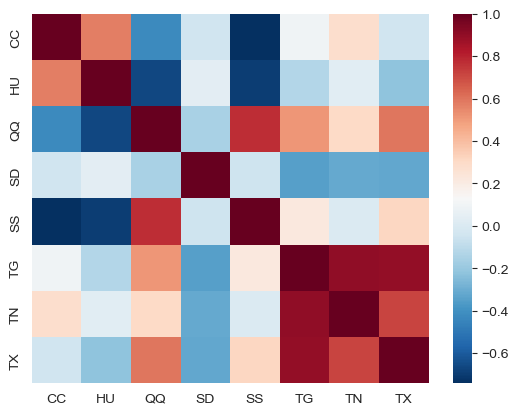

In [65]:
# hotmap
sns.heatmap(datadf_ESKDALEMUIR_real[['CC','HU','QQ','SD','SS','TG','TN','TX']].corr(),cmap="RdBu_r")

In [66]:
# By looking at the heat map above CC QQ SS was selected as the feature
model_data = datadf_ESKDALEMUIR_real[['DATE','CC','QQ','SS','TG','TN','TX']]
model_data.to_csv('./ESKDALEMUI_data_renew.csv', sep=',', index=False, header=True, encoding='utf-8')

In [67]:
model_data = pd.read_csv('ESKDALEMUI_data_renew.csv')
model_data

,DATE,CC,QQ,SS,TG,TN,TX
0,19570101,8.0,8.00000,0.000000,28.0,11.0,61.0
1,19570102,8.0,8.00000,0.000000,20.0,-22.0,89.0
2,19570103,7.0,12.00000,2.000000,36.0,-17.0,100.0
3,19570104,7.0,8.00000,0.000000,70.0,39.0,100.0
4,19570105,7.0,8.00000,0.000000,72.0,44.0,72.0
...,...,...,...,...,...,...,...
24132,20230127,6.0,95.89327,30.908865,-3.0,-37.0,76.0
24133,20230128,7.0,42.00000,32.000000,21.0,-33.0,81.0
24134,20230129,7.0,13.00000,0.000000,54.0,27.0,79.0
24135,20230130,6.0,49.00000,43.000000,57.0,35.0,61.0


# Prophet model

# multivaries：ESKDALEMUIR

In [68]:
# Dividing the data Training set and test set
model_data_TG_test  = model_data[['DATE','TG','CC','QQ','SS']][-7300:]
model_data_TG_test['DATE'] = pd.to_datetime(model_data_TG_test['DATE'], format='%Y%m%d') #convert time
model_data_TG_test = model_data_TG_test.rename(columns={'DATE':'ds', 'TG':'y'})

model_data_TG_train = model_data[['DATE','TG','CC','QQ','SS']][:-7300]
model_data_TG_train = model_data_TG_test.rename(columns={'DATE':'ds', 'TG':'y'})
model_data_TG_train

,ds,y,CC,QQ,SS
16837,2003-02-06,-7.000000,8.0,13.00000,0.000000
16838,2003-02-07,32.000000,8.0,24.00000,0.000000
16839,2003-02-08,51.000000,8.0,13.00000,0.000000
16840,2003-02-09,73.774144,4.0,67.00000,62.000000
16841,2003-02-10,10.000000,7.0,26.00000,0.000000
...,...,...,...,...,...
24132,2023-01-27,-3.000000,6.0,95.89327,30.908865
24133,2023-01-28,21.000000,7.0,42.00000,32.000000
24134,2023-01-29,54.000000,7.0,13.00000,0.000000
24135,2023-01-30,57.000000,6.0,49.00000,43.000000


In [69]:
model_data_TG_test

,ds,y,CC,QQ,SS
16837,2003-02-06,-7.000000,8.0,13.00000,0.000000
16838,2003-02-07,32.000000,8.0,24.00000,0.000000
16839,2003-02-08,51.000000,8.0,13.00000,0.000000
16840,2003-02-09,73.774144,4.0,67.00000,62.000000
16841,2003-02-10,10.000000,7.0,26.00000,0.000000
...,...,...,...,...,...
24132,2023-01-27,-3.000000,6.0,95.89327,30.908865
24133,2023-01-28,21.000000,7.0,42.00000,32.000000
24134,2023-01-29,54.000000,7.0,13.00000,0.000000
24135,2023-01-30,57.000000,6.0,49.00000,43.000000


In [70]:
model_data_TG_train['ds'] = pd.to_datetime(model_data_TG_train['ds'], format='%Y%m%d') #convert time
meanD = model_data_TG_train['y'].mean()
stdD = model_data_TG_train['y'].std()
model_data_TG_train['y'] = (model_data_TG_train['y'] - meanD ) / (stdD)  # 归一化
m = Prophet()
# add multiple variables
m.add_regressor('CC')
m.add_regressor('QQ')
m.add_regressor('SS')
m.fit(model_data_TG_train)
# future = m.make_future_dataframe(periods=30, freq='D') # 以天为单位 预测后面30天
# future.tail()
forecast = m.predict(model_data_TG_test.drop(columns='y'))
forecast[forecast['ds']=='2023-4-1']['yhat']

NameError: name 'Prophet' is not defined

In [ ]:
m.plot(forecast)

In [ ]:
m.plot_components(forecast)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
forecast['yhat'] = forecast['yhat']*stdD +  meanD #恢复原来数据级
forecast['yhat_lower'] = forecast['yhat_lower']*stdD +  meanD
forecast['yhat_upper'] = forecast['yhat_upper']*stdD +  meanD
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-7300:]

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
#  Plot a line graph of three different predicted values
fig.add_trace(go.Line(x=model_data_TG_test['ds'], y=model_data_TG_test['y'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Line(x=forecast['ds'][-7300:], y=forecast['yhat'],
                    mode='lines',
                    name='predicted'))

#  Adding captions and descriptions of the x/y axes to the graph
fig.update_layout(title='Forecast of Average Temperature (Edinburgh)',
                   xaxis_title='Date',
                   yaxis_title='Average Temperature (0.1°C)')
fig.show()

In [ ]:
def value_selection(name, period):
    model_data_test  = model_data[['DATE',name,'CC','QQ','SS']][-period:]
    model_data_test['DATE'] = pd.to_datetime(model_data_test['DATE'], format='%Y%m%d') #time convert
    model_data_test = model_data_test.rename(columns={'DATE':'ds', name:'y'})

    model_data_train = model_data[['DATE',name,'CC','QQ','SS']][:-period]
    model_data_train = model_data_test.rename(columns={'DATE':'ds', name:'y'})
    
    model_data_train['ds'] = pd.to_datetime(model_data_train['ds'], format='%Y%m%d') #time convert
    meanD = model_data_train['y'].mean()
    stdD = model_data_train['y'].std()
    model_data_train['y'] = (model_data_train['y'] - meanD ) / (stdD)  # 归一化
    m = Prophet()
    # adding variables
    m.add_regressor('CC')
    m.add_regressor('QQ')
    m.add_regressor('SS')
    m.fit(model_data_train)
    # future = m.make_future_dataframe(periods=30, freq='D')
    # future.tail()
    forecast = m.predict(model_data_test.drop(columns='y'))
    
    forecast['yhat'] = forecast['yhat']*stdD +  meanD #recover previous data level
    forecast['yhat_lower'] = forecast['yhat_lower']*stdD +  meanD
    forecast['yhat_upper'] = forecast['yhat_upper']*stdD +  meanD
    
    return model_data_test['y'], forecast['yhat']

In [ ]:
y_lower, yhat_lower = value_selection('TN', 7300)

fig2 = go.Figure()
fig2.add_trace(go.Line(x=model_data_TG_test['ds'], y = y_lower,
                    mode='lines',
                    name='real'))
fig2.add_trace(go.Line(x=forecast['ds'][-7300:], y = yhat_lower,
                    mode='lines',
                    name='predicted'))

# Adding captions and descriptions of the x/y axes to the graph
fig2.update_layout(title='Forecast of Minimum Temperature (Edinburgh)',
                   xaxis_title='Date',
                   yaxis_title='Minimum Temperature (0.1°C)')
fig2.show()

In [ ]:
y_upper, yhat_upper = value_selection('TX', 7300)

fig3 = go.Figure()
fig3.add_trace(go.Line(x=model_data_TG_test['ds'], y = y_upper,
                    mode='lines',
                    name='real'))
fig3.add_trace(go.Line(x=forecast['ds'][-7300:], y = yhat_upper,
                    mode='lines',
                    name='predicted'))

# Adding captions and descriptions of the x/y axes to the graph
fig3.update_layout(title='Forecast of Maximum Temperature (Edinburgh)',
                   xaxis_title='Date',
                   yaxis_title='Maximum Temperature (0.1°C)')
fig3.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
 
def evaluation(y, y_hat):
    mae = metrics.mean_absolute_error(y, y_hat)
    mse = metrics.mean_squared_error(y, y_hat)
    rmse = np.sqrt(metrics.mean_squared_error(y, y_hat))
    mape = metrics.mean_absolute_percentage_error(y, y_hat)
    wmape = abs(y-yhat).sum()/y.sum()
    r_2=metrics.r2_score(y, y_hat)
    return mae, mse, rmse, mape, wmape, r_2  #mse

y = np.array(model_data_TG_test['y'])
yhat = np.array(forecast['yhat'])


df_eval = pd.DataFrame(index=['MAE','MSE','RMSE','MAPE','WMAPE','R2'])

scores_ave = list(evaluation(y, yhat))

def del_zero(name):
    for i in range(len(name)):
        if name[i] < 0.01 and name[i] > -0.01:
            name[i] =1.
    return name


y1 = np.array(y_lower)
yhat1 = np.array(yhat_lower)
scores_lower = list(evaluation(del_zero(y1), yhat1))

y2 = np.array(y_upper)
yhat2 = np.array(yhat_upper)
scores_upper = list(evaluation(del_zero(y2), yhat2))
                    
df_eval.loc[:,'Average']= scores_ave
df_eval.loc[:,'Minimum']= scores_lower
df_eval.loc[:,'Maximum']= scores_upper

df_eval.drop(index='MSE').drop(index='MAPE')

# Second city weather forecast

In [ ]:
london_data = pd.read_csv('data_copy.csv')
london_data

In [ ]:
model_data_london = london_data[['date','cloud_cover','global_radiation','sunshine','mean_temp','min_temp','max_temp']]
model_data_london.rename(columns={"date":"DATE","cloud_cover":"CC",'global_radiation':'QQ','sunshine':'SS','mean_temp':'TG','min_temp':'TN','max_temp':'TX'},inplace=True)
model_data_london.to_csv('./LONDON_data_renew.csv', sep=',', index=False, header=True)
model_data_london

In [ ]:
model_data_TG_test  = model_data_london[['DATE','TG','CC','QQ','SS']][-7300:]
model_data_TG_test['DATE'] = pd.to_datetime(model_data_TG_test['DATE'], format='%Y%m%d') #time convert
model_data_TG_test = model_data_TG_test.rename(columns={'DATE':'ds', 'TG':'y'})

model_data_TG_train = model_data[['DATE','TG','CC','QQ','SS']][:-7300]
model_data_TG_train = model_data_TG_test.rename(columns={'DATE':'ds', 'TG':'y'})
model_data_TG_train

In [ ]:
model_data_TG_train['ds'] = pd.to_datetime(model_data_TG_train['ds'], format='%Y%m%d') #time convert
meanD = model_data_TG_train['y'].mean()
stdD = model_data_TG_train['y'].std()
model_data_TG_train['y'] = (model_data_TG_train['y'] - meanD ) / (stdD)  # 归一化
m = Prophet()
# adding multiple variables
m.add_regressor('CC')
m.add_regressor('QQ')
m.add_regressor('SS')
m.fit(model_data_TG_train)
# future = m.make_future_dataframe(periods=30, freq='D') # 以天为单位 预测后面30天
# future.tail()
forecast = m.predict(model_data_TG_test.drop(columns='y'))
forecast[forecast['ds']=='2023-4-1']['yhat']

In [ ]:
m.plot(forecast)

In [ ]:
m.plot_components(forecast)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
forecast['yhat'] = forecast['yhat']*stdD +  meanD #恢复原来数据级
forecast['yhat_lower'] = forecast['yhat_lower']*stdD +  meanD
forecast['yhat_upper'] = forecast['yhat_upper']*stdD +  meanD
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-7300:]

In [ ]:
def value_selection(name, period):
    model_data_test  = model_data_london[['DATE',name,'CC','QQ','SS']][-period:]
    model_data_test['DATE'] = pd.to_datetime(model_data_test['DATE'], format='%Y%m%d') #转换时间
    model_data_test = model_data_test.rename(columns={'DATE':'ds', name:'y'})

    model_data_train = model_data[['DATE',name,'CC','QQ','SS']][:-period]
    model_data_train = model_data_test.rename(columns={'DATE':'ds', name:'y'})
    
    model_data_train['ds'] = pd.to_datetime(model_data_train['ds'], format='%Y%m%d') #time convert
    meanD = model_data_train['y'].mean()
    stdD = model_data_train['y'].std()
    model_data_train['y'] = (model_data_train['y'] - meanD ) / (stdD)  # 归一化
    m = Prophet()
    # adding multiple variables
    m.add_regressor('CC')
    m.add_regressor('QQ')
    m.add_regressor('SS')
    m.fit(model_data_train)
    # future = m.make_future_dataframe(periods=30, freq='D'
    # future.tail()
    forecast = m.predict(model_data_test.drop(columns='y'))
    
    forecast['yhat'] = forecast['yhat']*stdD +  meanD #恢复原来数据级
    forecast['yhat_lower'] = forecast['yhat_lower']*stdD +  meanD
    forecast['yhat_upper'] = forecast['yhat_upper']*stdD +  meanD
    
    return model_data_test['y'], forecast['yhat']

In [ ]:
y_ave_london, yhat_ave_london = value_selection('TG',7300)

fig4 = go.Figure()
# plot
fig4.add_trace(go.Line(x=model_data_TG_test['ds'], y=y_ave_london,
                    mode='lines',
                    name='real'))
fig4.add_trace(go.Line(x=forecast['ds'][-7300:], y=yhat_ave_london,
                    mode='lines',
                    name='predicted'))


fig4.update_layout(title='Forecast of Average Temperature (London)',
                   xaxis_title='Date',
                   yaxis_title='Average Temperature (0.1°C)')
fig4.show()

In [ ]:
y_min_london, yhat_min_london = value_selection('TN',7300)

fig5 = go.Figure()
# plot
fig5.add_trace(go.Line(x=model_data_TG_test['ds'], y=y_min_london,
                    mode='lines',
                    name='real'))
fig5.add_trace(go.Line(x=forecast['ds'][-7300:], y=yhat_min_london,
                    mode='lines',
                    name='predicted'))


fig5.update_layout(title='Forecast of Minimum Temperature (London)',
                   xaxis_title='Date',
                   yaxis_title='Minimum Temperature (0.1°C)')
fig5.show()

In [ ]:
y_max_london, yhat_max_london = value_selection('TX',7300)

fig6 = go.Figure()
# plot
fig6.add_trace(go.Line(x=model_data_TG_test['ds'], y=y_max_london,
                    mode='lines',
                    name='real'))
fig6.add_trace(go.Line(x=forecast['ds'][-7300:], y=yhat_max_london,
                    mode='lines',
                    name='predicted'))


fig6.update_layout(title='Forecast of Maximum Temperature (London)',
                   xaxis_title='Date',
                   yaxis_title='Mimum Temperature (0.1°C)')
fig6.show()

In [ ]:
y = np.array(model_data_TG_test['y'])
yhat = np.array(forecast['yhat'])


df_eval_london = pd.DataFrame(index=['MAE','MSE','RMSE','MAPE','WMAPE','R2'])

y3 = np.array(y_ave_london)
yhat3 = np.array(yhat_ave_london)
scores_ave_london = list(evaluation(del_zero(y3), yhat3))

y4 = np.array(y_min_london)
yhat4 = np.array(yhat_min_london)
scores_min_london = list(evaluation(del_zero(y4), yhat4))

y5 = np.array(y_max_london)
yhat5 = np.array(yhat_max_london)
scores_max_london = list(evaluation(del_zero(y5), yhat5))
                    
df_eval_london.loc[:,'Average']= scores_ave_london
df_eval_london.loc[:,'Minimum']= scores_min_london
df_eval_london.loc[:,'Maximum']= scores_max_london

df_eval_london.drop(index='MSE').drop(index='MAPE')

In [ ]:
a = list(range(10))
a

In [ ]:
a[-3:]

In [ ]:
a[:-3]